### x lines of Python

# Find and analyse global seismic data

We'll look at 3 non-earthquakes:

1. A landslide and tsunami in Greenland, June 2017.
1. A nuclear weapon test in North Korea, September 2017.
1. A hurricane in the west Atlantic, September 2017.


## Landslide in Greenland

Jascha's tweet... https://twitter.com/CPPGeophysics/status/876502352710086656

Article... http://temblor.net/earthquake-insights/greenland-earthquake-was-a-phantom-the-landslide-and-tsunami-were-real-4468/

Video... https://www.youtube.com/watch?v=LzSUDBbSsPI

Sound... http://ds.iris.edu/files/products/seissound/data/Movie/10228170_DK_NUUG_HHZ_2017_06_17_233912_vco_720.mp4
(from http://ds.iris.edu/ds/products/seissound/data/repository/)

First some preliminaries to make sure we get inline plots, and to turn off some matplotlib 2.0 warnings about a call ObsPy is making in its plotting functions somewhere.

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from obspy.clients.fdsn import Client
client = Client("GFZ")

I'm just following the [instructions in the ObsPy documentation](https://docs.obspy.org/packages/obspy.clients.fdsn.html).

The event was at about 2340 UTC, but I'm going to grab a 2 hours' worth of data, starting well before the landslide event. You'll see why in a minute.

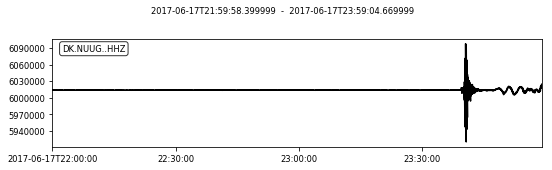

In [3]:
from obspy import UTCDateTime
t = UTCDateTime("2017-06-17_22:00:00")
st = client.get_waveforms("DK", "NUUG", "*", "HHZ", t, t + 2*60*60)
st.plot()  

Channels:
    
- `LHZ`: long period ~1 Hz, with `Z` for vertical, or `N` or `E` for horizontal.
- `BHZ`: broadband 10–80 Hz, with `Z` for vertical, or `N` or `E` for horizontal.
- `HHZ`: broadband 80–250 Hz, with `Z` for vertical, or `N` or `E` for horizontal.
- Some stations have loads of others, see Appendix A in [the SEED Manual](http://www.fdsn.org/seed_manual/SEEDManual_V2.4.pdf).

## Where is the station?

ObsPY is pretty cool. It can draw a map showing us where stations and events are.

Note that to do this you need `basemap` and `cartopy`:

    conda install basemap
    conda install cartopy

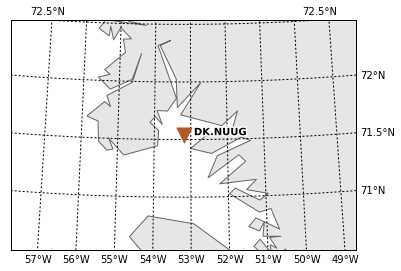

In [4]:
import matplotlib.pyplot as plt

inventory = client.get_stations(network="DK", station="NUUG")
inventory.plot(projection='local')  # Can be global or ortho or local (at low res by default)
plt.show()

In [5]:
inventory

Inventory created at 2017-09-08T01:43:51.000000Z
	Sending institution: SeisComP3 (GFZ)
	Contains:
		Networks (1):
			DK
		Stations (1):
			DK.NUUG (Station Nuugaatsiaq, Greenland)
		Channels (0):


## Get the data from the stream

The ObsPy stream object contains all our data:

In [6]:
st

1 Trace(s) in Stream:
DK.NUUG..HHZ | 2017-06-17T21:59:58.399999Z - 2017-06-17T23:59:04.669999Z | 100.0 Hz, 714628 samples

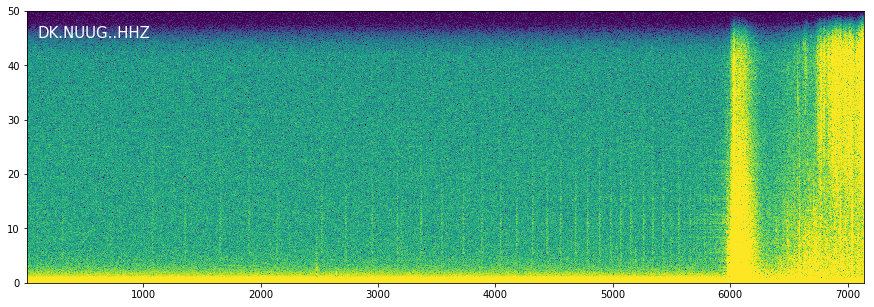

In [7]:
z = st.traces[0].data
NFFT = 2048
Fs = st.traces[0].meta.sampling_rate  # Sample rate in Hz
label = "{network}.{station}.{location}.{channel}".format(**st.traces[0].meta)

plt.figure(figsize=(15, 5))
Pxx, freqs, bins, im = plt.specgram(z, NFFT=NFFT, Fs=Fs, noverlap=int(0.9*NFFT), cmap='viridis', vmin=-30, vmax=30)
plt.text(100, 45, label, size=15, color='white')
plt.show()

Notice the increasingly frequent signals preceeding the landslide event. 

<hr>

## Nuclear test in North Korea

Let's move around the world to a different kind of event. North Korea [made another nuclear test this morning](https://www.theguardian.com/world/2017/sep/03/north-korean-nuclear-test-confirmed-in-major-escalation-by-kim-jong-un) just after 0330 UTC. Inspired by [Steven Gibbons's tweets](https://twitter.com/stevenjgibbons/status/904238963908648960) the morning of the test, I wanted to download the data for myself.

From his tweets, we want station [**MDJ**](https://www.fdsn.org/station_book/CD/MDJ/mdj.html) in eastern China, which is in network code [**IC**](http://www.fdsn.org/networks/detail/IC/).

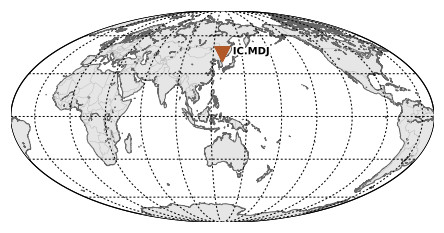

In [8]:
client = Client("IRIS")

inventory = client.get_stations(network="IC", station="MDJ")
inventory.plot()
plt.show()

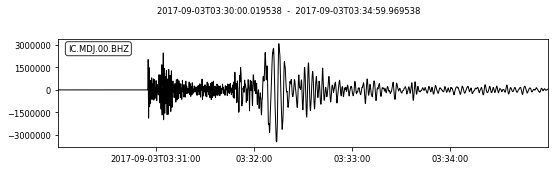

In [9]:
t = UTCDateTime("2017-09-03_03:30:00")
st = client.get_waveforms("IC", "MDJ", "00", "BHZ", t, t + 5*60)
st.plot()  

Again, following Steve's tweets, let's compare to the test last year, on 9 September 2016 at 0030 UTC:

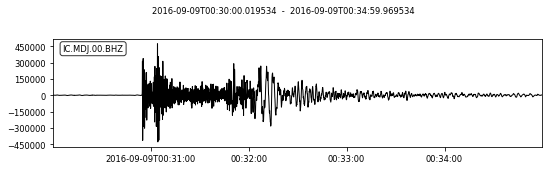

In [10]:
t = UTCDateTime("2016-09-09_00:30:00")
st1 = client.get_waveforms("IC", "MDJ", "00", "BHZ", t, t + 5*60)
st1.plot()  

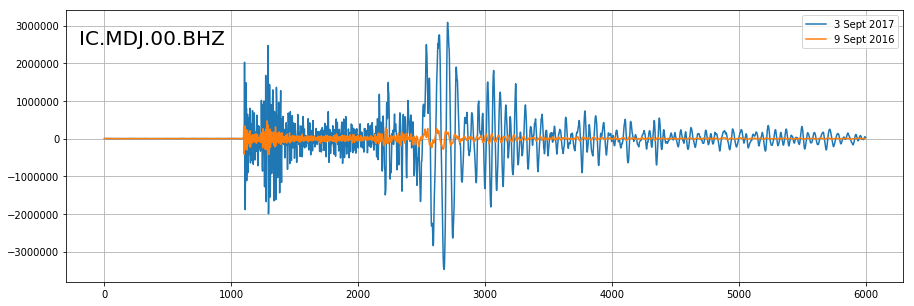

In [11]:
label = "{network}.{station}.{location}.{channel}".format(**st.traces[0].meta)

plt.figure(figsize=(15,5))
plt.plot(st.traces[0], label="3 Sept 2017")
plt.plot(st1.traces[0], label="9 Sept 2016")
plt.text(-200, 2.5e6, label, size=20)
plt.legend()
plt.grid()
plt.show()

I'll leave making the spectrogram for this event as an exercise for the reader. Hint: use the `HHZ` channel for better time resolution, and get a longer signal for better frequency resolution. See if you can see evidence for other events (chamber collapse? [Landslides?](https://twitter.com/stevenjgibbons/status/905143760270618625) about 10 minutes after the detonation.

## Hurricane Irma

This time we'll get inspired by [@seismo_steve's tweets](https://twitter.com/seismo_steve/status/905315486736449537) about Irma. He used stations on Barduda, Guadalupe, and St Maarten; we'll find the one in Barbuda, in the USGS Caribbean [`CU`](http://www.fdsn.org/networks/detail/CU/) network.

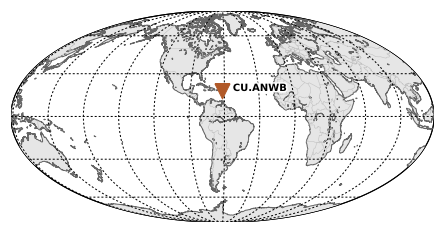

In [12]:
client = Client("IRIS")

inventory = client.get_stations(network="CU", station="ANWB")
inventory.plot(projection='global')  # Can be global or ortho or local (at low res by default_)
plt.show()

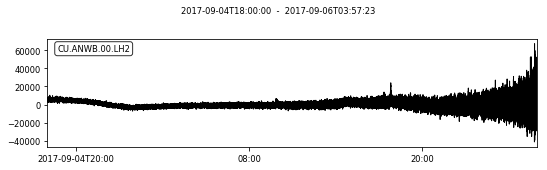

In [13]:
t0 = UTCDateTime("2017-09-04_18:00:00")
t1 = t0 + 36*60*60

st = client.get_waveforms("CU", "ANWB", "00", "LH2", t0, t1)
st.plot()  

In [14]:
st.traces[0].meta.sampling_rate

1.0

The **LH2** channel is long period, with a 1 Hz sample rate. Let's clean it up a bit by eliminating the low frequency wiggle.

In [15]:
st.filter('highpass', freq=0.1)

1 Trace(s) in Stream:
CU.ANWB.00.LH2 | 2017-09-04T18:00:00.000000Z - 2017-09-06T03:57:23.000000Z | 1.0 Hz, 122244 samples

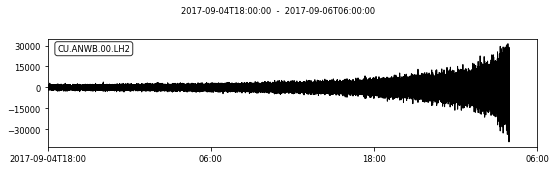

In [16]:
st.plot(endtime=t1)

This compares well with [Steve's tweet](https://twitter.com/seismo_steve/status/905320899733282816). 

You can clearly see the increase in noise as the storm approaches, and the failure of communications (or some other critical part of the system) and loss of signal.

<hr>

**&copy; 2017 [agilescientific.com](https://www.agilescientific.com/) and licensed [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)**